Number of tuples in the dataset:  1795
Number of unique company names:  416
Number of reviews in 2013:  Company                      184
SpecificBeanOriginBarName    184
REF                          184
ReviewDate                   184
CocoaPercent                 184
CompanyLocation              184
Rating                       184
BeanType                     184
BroadBeanOrigin              184
dtype: int64
Number of BeanType missing values:  887
[[3.75]
 [2.75]
 [3.  ]
 ...
 [3.5 ]
 [3.25]
 [3.  ]]
      Company  CompanyLocation
0         0.0             18.0
1         0.0             18.0
2         0.0             18.0
3         0.0             18.0
4         0.0             18.0
...       ...              ...
1790    409.0              3.0
1791    409.0              3.0
1792    409.0              3.0
1793    409.0              3.0
1794    409.0              3.0

[1788 rows x 2 columns]


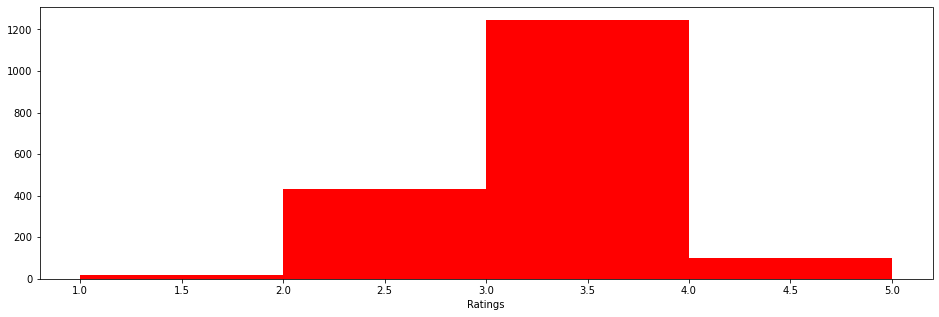

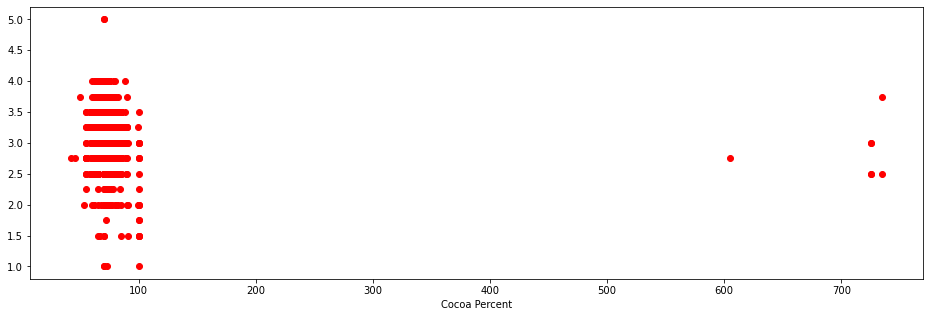

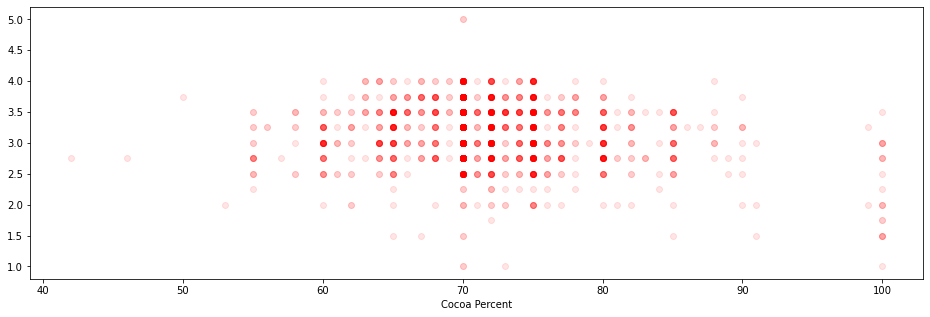

In [1]:
# 1. Download the Dataset
import pandas as pd

#2. Read the dataset into a Pandas DataFrame!
df = pd.read_csv("flavors_of_cacao.csv")
df.columns =['Company', 'SpecificBeanOriginBarName',
       'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating',
       'BeanType', 'BroadBeanOrigin']
#3.	Exploring the Dataset
#display(df.head(20))
# How many tuples are there in the dataset?
tuples_number=len(df)
print("Number of tuples in the dataset: ", tuples_number)

#How many unique company names are there in the dataset?
unique_company=len(df.Company.unique())
print("Number of unique company names: ", unique_company)
#How many reviews are made in 2013 in the dataset?
#df.groupby(["ReviewDate"]).count()
reviews_2013=df[df.ReviewDate == 2013].count()
print("Number of reviews in 2013: ", reviews_2013)
#In the BeanType column, how many missing values are there?
#Note BeanType, column 0 has a missing value
df["BeanType"][0]
beanType_missing_values= len(df[df.BeanType == '\xa0'].values)
print("Number of BeanType missing values: ", beanType_missing_values )
#4.	Visualization
#Visualize the rating column with a histogram!
import matplotlib.pyplot as plt
ratings = df.Rating.values
#print("Rating values: ",ratings)
plt.figure(figsize=(16,5))
plt.hist(ratings, bins=4, color ="red")
plt.xlabel("Ratings")
#Convert and Visualize
#Convert the CocoaPercent
#Change the type of values in the cocoa percent from string values to numerical values.
#5.	Visualize
df["CocoaPercent"] = df["CocoaPercent"].str.replace(r'\D',"").astype(int)
cocoa_percent = df.CocoaPercent.values
plt.figure(figsize=(16,5))
plt.scatter(cocoa_percent, ratings, color ="red")
plt.xlabel("Cocoa Percent")
#df.describe()
###
df.drop(df[df.CocoaPercent>100].index, inplace=True)
#cocoa_percent_new = df.CocoaPercent.values
ratings = df.Rating.values
cocoa_percent = df.CocoaPercent.values
plt.figure(figsize=(16,5))
plt.scatter(cocoa_percent, ratings, color ="red", alpha=0.1)
plt.xlabel("Cocoa Percent")
#print(df)

#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.iloc[:,6:7].values
x_normalized = scaler.fit_transform(x)
print (x)
#df
x_normalized
df.groupby("Company")["Rating"].agg(["mean"]).sort_values(by="mean", ascending=False)

#Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["Company", "CompanyLocation"]] = enc.fit_transform(df[["Company", "CompanyLocation"]])
print(df[["Company", "CompanyLocation"]])
